Filtering exercise: exam scores are X ~ U(0, 100), and the passing score is 60. So. A = [60, 100]. Hence, p_success = 0.4. Define Z = X_T to be the first pass. What is distribution and expected value of Z?

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n_trials = 10**6  # simulation length
passing_score = 60
total_points = 100
p = (total_points - passing_score)/total_points  # probability of passing the exam (favourable outcomes are between [60,100])


# Generate scores until first pass
T_samples = [] #number of tries at which first passing score appears
Z_samples = [] #first passing score obtained




Make a loop over n_trials and compute the estimates

In [ ]:
for i in range(n_trials):
    t = 1
    while 1:
        x = np.random.uniform(0, 100)
        if x >= passing_score: 
            Z_samples.append(x)
            T_samples.append(t)
            break
        t += 1

#T_samples = np.array(T_samples)
#Z_samples = np.array(Z_samples)

# Theoretical 
E_T_theory = 1 / p
Var_T_theory = (1 - p) / (p**2)
E_Z_theory = (passing_score + total_points) / 2  # mean of Uniform(60,100)

#Simulation
E_T_sim = np.mean(T_samples)
E_Z_sim = np.mean(Z_samples)


print("Expectation of T (theory):", E_T_theory)
print("Expectation of T (sim):   ", E_T_sim)
print("Variance of T (theory):  ", Var_T_theory)
print("Variance of T (sim):     ", np.var(T_samples))

print("\nExpectation of Z (theory):", E_Z_theory)
print("Expectation of Z (sim):   ", E_Z_sim)

/Users/garveetjain/Desktop/intro_to_ds_starting_package/env/lib/python3.13/site-packages/numpy/lib/_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges


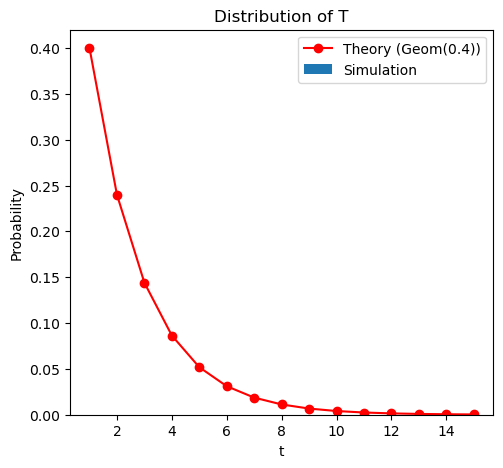

In [7]:
# Distribution of T
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
max_t = 15
counts, bins = np.histogram(T_samples, bins=np.arange(1, max_t+1),  density=True)
plt.bar(bins[:-1], counts, label="Simulation")

# Theoretical pmf
t_vals = np.arange(1, max_t+1)
plt.plot(t_vals, (1-p)**(t_vals-1)*p, 'ro-', label="Theory (Geom(0.4))")
plt.title("Distribution of T")
plt.xlabel("t")
plt.ylabel("Probability")
plt.legend()




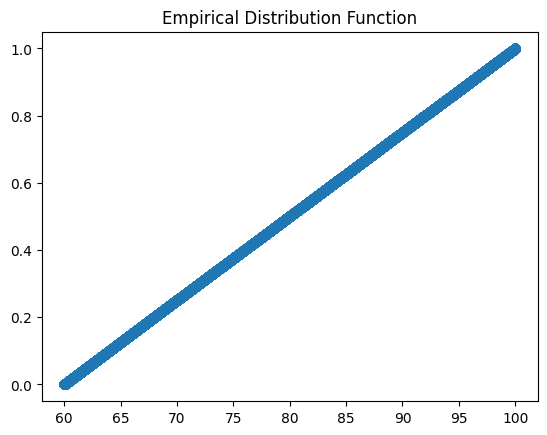

In [ ]:
#from utils import makeEDF, plotEDF
#Z_edf = makeEDF(Z_samples)
#plotEDF(Z_edf)
#Z_edf



In [1]:
# Z_samples

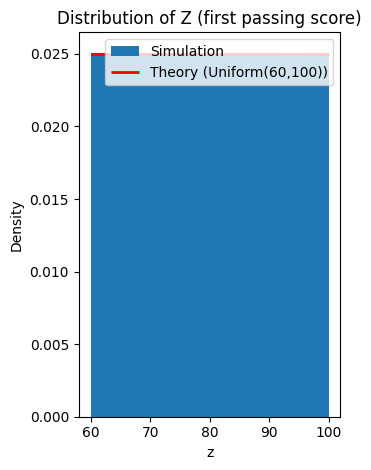

In [12]:
# Distribution of Z
plt.subplot(1,2,2)
plt.hist(Z_samples, density=True, label="Simulation")
plt.hlines(1/(total_points - passing_score), passing_score, total_points, colors='r', lw=2, label="Theory (Uniform(60,100))")
plt.title("Distribution of Z (first passing score)")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

(array([0.02503507, 0.02522407, 0.02495857, 0.02490832, 0.02502282,
        0.02501107, 0.02497657, 0.02491582, 0.02487157, 0.02507682]),
 array([60.00005911, 64.00004742, 68.00003573, 72.00002405, 76.00001236,
        80.00000068, 83.99998899, 87.99997731, 91.99996562, 95.99995393,
        99.99994225]),
 <BarContainer object of 10 artists>)

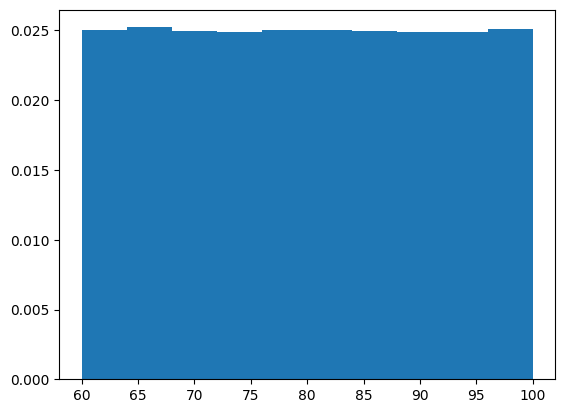

In [11]:
plt.hist(Z_samples, density=True, label="Simulation")